Key Insights from Household Expenditure Analysis:
1. Sector-wise Expenditure Analysis:
  Sector_Category          mean        median           std
0           Rural  17585.300449  15513.296477  10961.576149
1           Urban  25061.011147  21779.779843  16179.033502

2. Household Type Expenditure Analysis:
                                  HH_Type          mean        median  \
0        Self-employed in non-agriculture  24953.851561  21699.549902   
1            Self-employed in agriculture  21966.914019  18842.491194   
2  Regular wage/salary in non-agriculture  21908.081861  19244.210372   
3      Regular wage/salary in agriculture  18133.569524  16538.152642   
4                                  Others  16353.640151  13231.227006   
5         Casual labor in non-agriculture  15857.775983  14348.829746   
6             Casual labor in agriculture  14015.697970  12719.332681   

            std  
0  15283.968740  
1  14846.224794  
2  13145.477466  
3   9409.107890  
4  13372.153808  

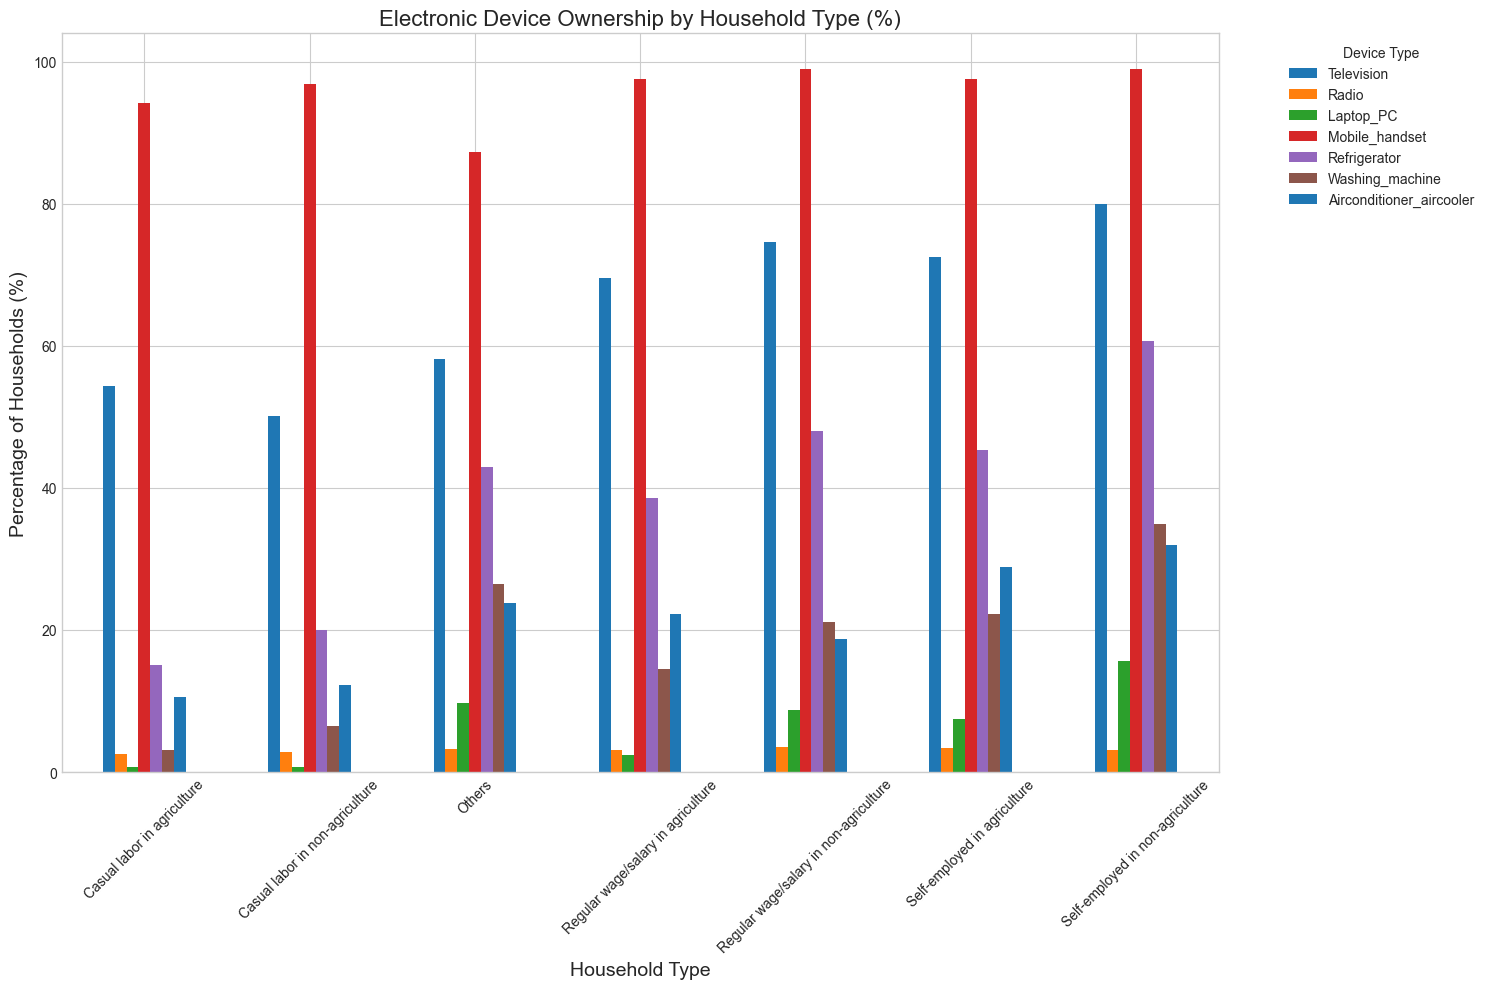

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
sns.set_palette(sns.color_palette(colors))

# Read the dataset
# Replace 'your_file.csv' with the actual file path
df = pd.read_csv('Merged_household_data.csv')

# Define mappings for clearer interpretation
religion_mapping = {
    1: 'Hinduism',
    2: 'Islam',
    3: 'Christianity',
    4: 'Sikhism',
    5: 'Others',
    9: 'Not reported'
}

household_type_mapping = {
    1: 'Self-employed in agriculture',
    2: 'Self-employed in non-agriculture',
    3: 'Regular wage/salary in agriculture',
    4: 'Regular wage/salary in non-agriculture',
    5: 'Casual labor in agriculture',
    6: 'Casual labor in non-agriculture',
    9: 'Others'
}

social_group_mapping = {
    1: 'SC',
    2: 'ST',
    3: 'OBC',
    9: 'Others'
}

sector_mapping = {
    1: 'Rural',
    2: 'Urban'
}

# Apply mappings
df['Religion'] = df['Religion of the head of the household'].map(religion_mapping)
df['HH_Type'] = df['Household Type'].map(household_type_mapping)
df['Social_Group'] = df['Social Group of the head of the household'].map(social_group_mapping)
df['Sector_Category'] = df['Sector'].map(sector_mapping)

# Calculate number of electronic devices per household
electronic_cols = [
    'Is_HH_Have_Television', 'Is_HH_Have_Radio', 'Is_HH_Have_Laptop_PC',
    'Is_HH_Have_Mobile_handset', 'Is_HH_Have_Refrigerator', 
    'Is_HH_Have_Washing_machine', 'Is_HH_Have_Airconditioner_aircooler'
]
df['Electronics_Count'] = df[electronic_cols].sum(axis=1)

# Calculate number of transport assets per household
transport_cols = [
    'Is_HH_Have_Bicycle', 'Is_HH_Have_Motorcycle_scooter',
    'Is_HH_Have_Motorcar_jeep_van', 'Is_HH_Have_Trucks', 
    'Is_HH_Have_Animal_cart'
]
df['Transport_Count'] = df[transport_cols].sum(axis=1)

# Calculate number of online purchases per household
online_cols = [col for col in df.columns if col.startswith('Is_online_')]
df['Online_Purchase_Count'] = df[online_cols].sum(axis=1)

# Function to format currency values
def format_rupees(x, pos):
    return f'₹{x/1000:.0f}K' if x >= 1000 else f'₹{x:.0f}'

# Create a figure for the dashboard
plt.figure(figsize=(20, 15))
plt.suptitle('Household Expenditure Analysis Dashboard', fontsize=24, y=0.98)
plt.close('all')  # Close the figure immediately to prevent display

# 1. Distribution of Total Expense
plt.subplot(3, 3, 1)
sns.histplot(df['TotalExpense'], kde=True, color=colors[0])
plt.title('Distribution of Total Household Expenses', fontsize=14)
plt.xlabel('Total Expense (₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_rupees))

# 2. Total Expense by Sector
plt.subplot(3, 3, 2)
sector_data = df.groupby('Sector_Category')['TotalExpense'].mean().reset_index()
sns.barplot(x='Sector_Category', y='TotalExpense', data=sector_data, palette=[colors[0], colors[1]])
plt.title('Average Expense by Sector', fontsize=14)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Average Total Expense (₹)', fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_rupees))

# 3. Total Expense by Household Type
plt.subplot(3, 3, 3)
hh_data = df.groupby('HH_Type')['TotalExpense'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='TotalExpense', y='HH_Type', data=hh_data, palette=colors)
plt.title('Average Expense by Household Type', fontsize=14)
plt.xlabel('Average Total Expense (₹)', fontsize=12)
plt.ylabel('Household Type', fontsize=12)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_rupees))

# 4. Total Expense by Religion
plt.subplot(3, 3, 4)
religion_data = df.groupby('Religion')['TotalExpense'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Religion', y='TotalExpense', data=religion_data, palette=colors)
plt.title('Average Expense by Religion', fontsize=14)
plt.xlabel('Religion', fontsize=12)
plt.ylabel('Average Total Expense (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_rupees))

# 5. Self-employed: Rural vs Urban comparison (Line graph)
plt.subplot(3, 3, 5)
self_employed = df[df['HH_Type'].str.contains('Self-employed', na=False)]
self_data = self_employed.groupby(['HH_Type', 'Sector_Category'])['TotalExpense'].mean().reset_index()
self_data_pivot = self_data.pivot(index='HH_Type', columns='Sector_Category', values='TotalExpense')
self_data_pivot.plot(kind='line', marker='o', linewidth=3, markersize=10)
plt.title('Self-employed: Rural vs Urban Expense', fontsize=14)
plt.xlabel('Self-employment Category', fontsize=12)
plt.ylabel('Average Total Expense (₹)', fontsize=12)
plt.xticks(rotation=15)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_rupees))
plt.legend(title='Sector')

# 6. Appliance Ownership Impact on Expense (Line graph)
plt.subplot(3, 3, 6)
impact_data = []
for col in electronic_cols:
    device_name = col.replace('Is_HH_Have_', '')
    with_device = df[df[col] == 1]['TotalExpense'].mean()
    without_device = df[df[col] == 0]['TotalExpense'].mean()
    impact_data.append({
        'Device': device_name,
        'With Device': with_device,
        'Without Device': without_device
    })

impact_df = pd.DataFrame(impact_data)
impact_df = impact_df.sort_values('With Device', ascending=False)

# Plot as a line graph
plt.plot(impact_df['Device'], impact_df['With Device'], 'o-', linewidth=2, label='With Device', color=colors[1])
plt.plot(impact_df['Device'], impact_df['Without Device'], 'o-', linewidth=2, label='Without Device', color=colors[0])
plt.title('Impact of Electronic Devices on Household Expense', fontsize=14)
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Average Total Expense (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_rupees))
plt.legend()

# 7. Households with Internet Users vs No Internet Users
plt.subplot(3, 3, 7)
df['Has_Internet'] = df['internet_users_count'] > 0
internet_data = df.groupby(['Has_Internet', 'Sector_Category'])['TotalExpense'].mean().reset_index()
internet_pivot = internet_data.pivot(index='Has_Internet', columns='Sector_Category', values='TotalExpense')
internet_pivot.plot(kind='bar', color=[colors[0], colors[1]])
plt.title('Internet Users Impact on Expense by Sector', fontsize=14)
plt.xlabel('Has Internet Users', fontsize=12)
plt.ylabel('Average Total Expense (₹)', fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_rupees))
plt.legend(title='Sector')

# 8. Education Level vs Total Expense by Sector (Scatter plot with regression line)
plt.subplot(3, 3, 8)
sns.scatterplot(data=df, x='avg_education', y='TotalExpense', hue='Sector_Category', alpha=0.5)
sns.regplot(data=df, x='avg_education', y='TotalExpense', scatter=False, color='black')
plt.title('Education Level vs Total Expense', fontsize=14)
plt.xlabel('Average Education Level', fontsize=12)
plt.ylabel('Total Expense (₹)', fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_rupees))
plt.legend(title='Sector')

# 9. Total Expense by Household Size and Sector (Line graph)
plt.subplot(3, 3, 9)
hh_size_data = df.groupby(['HH Size (For FDQ)', 'Sector_Category'])['TotalExpense'].mean().reset_index()
hh_size_pivot = hh_size_data.pivot(index='HH Size (For FDQ)', columns='Sector_Category', values='TotalExpense')
hh_size_pivot.plot(kind='line', marker='o', linewidth=3, markersize=10)
plt.title('Household Size vs Total Expense by Sector', fontsize=14)
plt.xlabel('Household Size', fontsize=12)
plt.ylabel('Average Total Expense (₹)', fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_rupees))
plt.legend(title='Sector')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('expenditure_analysis_dashboard.png', dpi=300, bbox_inches='tight')

# Create a heatmap of the correlation matrix for key variables
plt.figure(figsize=(12, 10))
plt.close('all')  # Close the previous figure
key_vars = [
    'TotalExpense', 'person_count', 'avg_age', 'avg_education', 
    'internet_users_count', 'Electronics_Count', 'Transport_Count',
    'Online_Purchase_Count', 'No. of meals usually taken in a day_mean'
]
correlation = df[key_vars].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, 
           linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix of Key Variables', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

# Create a detailed comparison of Rural vs Urban households across different types
plt.figure(figsize=(14, 8))
plt.close('all')  # Close the previous figure
sector_type_data = df.groupby(['Sector_Category', 'HH_Type'])['TotalExpense'].mean().reset_index()
sector_pivot = sector_type_data.pivot(index='HH_Type', columns='Sector_Category', values='TotalExpense')
sector_pivot.plot(kind='bar', color=[colors[0], colors[1]])
plt.title('Household Types: Rural vs Urban Expense Comparison', fontsize=16)
plt.xlabel('Household Type', fontsize=14)
plt.ylabel('Average Total Expense (₹)', fontsize=14)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_rupees))
plt.legend(title='Sector')
plt.tight_layout()
plt.savefig('rural_vs_urban_household_types.png', dpi=300, bbox_inches='tight')

# Additional analysis: Stacked bar chart of appliance ownership by household type
plt.figure(figsize=(15, 10))
plt.close('all')  # Close the previous figure
appliance_data = {}

for col in electronic_cols:
    appliance_name = col.replace('Is_HH_Have_', '')
    appliance_data[appliance_name] = df.groupby('HH_Type')[col].mean() * 100

appliance_df = pd.DataFrame(appliance_data)
appliance_df.plot(kind='bar', stacked=False, figsize=(15, 10))
plt.title('Electronic Device Ownership by Household Type (%)', fontsize=16)
plt.xlabel('Household Type', fontsize=14)
plt.ylabel('Percentage of Households (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Device Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('appliance_ownership_by_household_type.png', dpi=300, bbox_inches='tight')

# Print key insights
print("Key Insights from Household Expenditure Analysis:")
print("=" * 50)

# 1. Sector-wise comparison
sector_stats = df.groupby('Sector_Category')['TotalExpense'].agg(['mean', 'median', 'std']).reset_index()
print("1. Sector-wise Expenditure Analysis:")
print(sector_stats)
print()

# 2. Household Type Analysis
hh_type_stats = df.groupby('HH_Type')['TotalExpense'].agg(['mean', 'median', 'std']).sort_values('mean', ascending=False).reset_index()
print("2. Household Type Expenditure Analysis:")
print(hh_type_stats)
print()

# 3. Religion-wise Analysis
religion_stats = df.groupby('Religion')['TotalExpense'].agg(['mean', 'median', 'std']).sort_values('mean', ascending=False).reset_index()
print("3. Religion-wise Expenditure Analysis:")
print(religion_stats)
print()

# 4. Correlation between key factors and Total Expense
print("4. Correlation with Total Expense:")
for var in key_vars[1:]:  # Skip TotalExpense itself
    corr = df['TotalExpense'].corr(df[var])
    print(f"{var}: {corr:.4f}")
print()

# 5. Impact of electronic device ownership on expense
print("5. Impact of Electronic Devices on Expense:")
for col in electronic_cols:
    device_name = col.replace('Is_HH_Have_', '')
    with_device = df[df[col] == 1]['TotalExpense'].mean()
    without_device = df[df[col] == 0]['TotalExpense'].mean()
    diff_pct = ((with_device - without_device) / without_device) * 100
    print(f"{device_name}: {diff_pct:.2f}% higher expense when owned")
print()

print("Analysis completed and visualizations saved successfully!")

6. Lower vs Upper Income Households Analysis by Sector:


Text(0.5, 1.0, 'Average Total Expense by Sector-Income Groups')

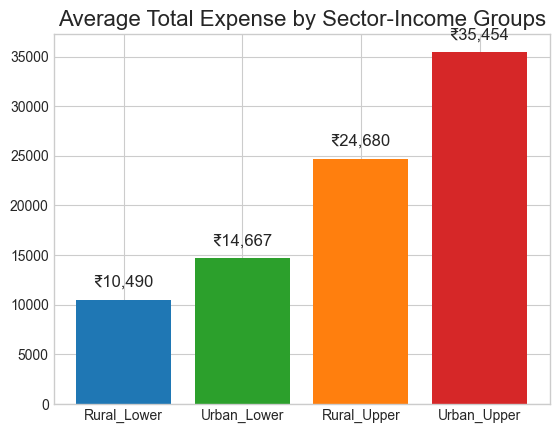

In [5]:
# Add analysis for lower vs upper urban and rural households based on median expense
print("6. Lower vs Upper Income Households Analysis by Sector:")

# Create median-based income groups within each sector
df['Income_Group'] = 'Medium'
for sector in df['Sector_Category'].unique():
    sector_median = df[df['Sector_Category'] == sector]['TotalExpense'].median()
    
    # Lower income: Below median
    df.loc[(df['Sector_Category'] == sector) & 
           (df['TotalExpense'] < sector_median), 'Income_Group'] = 'Lower'
    
    # Upper income: Above median
    df.loc[(df['Sector_Category'] == sector) & 
           (df['TotalExpense'] > sector_median), 'Income_Group'] = 'Upper'

# Create a combined sector-income group variable
df['Sector_Income'] = df['Sector_Category'] + '_' + df['Income_Group']

# Filter to just Lower and Upper groups
sector_income_df = df[df['Income_Group'] != 'Medium']

# Plot expenses by sector-income groups
plt.figure(figsize=(12, 8))
plt.close('all')  # Close the previous figure

# Calculate mean expenses for each group
sector_income_stats = sector_income_df.groupby('Sector_Income')['TotalExpense'].mean().reset_index()
sector_income_stats = sector_income_stats.sort_values('TotalExpense')

# Create bar chart
bar_colors = [colors[0], colors[2], colors[1], colors[3]]  # Different colors for each group
bars = plt.bar(sector_income_stats['Sector_Income'], sector_income_stats['TotalExpense'], color=bar_colors)

# Add expense values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
            f'₹{int(height):,}', ha='center', va='bottom', fontsize=12)

plt.title('Average Total Expense by Sector-Income Groups', fontsize=16)